In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"D:\online_gaming_insights.csv")

In [4]:
df

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40029,49029,32,Male,USA,Strategy,20.619662,0,Easy,4,75,85,14,Medium
40030,49030,44,Female,Other,Simulation,13.539280,0,Hard,19,114,71,27,High
40031,49031,15,Female,USA,RPG,0.240057,1,Easy,10,176,29,1,High
40032,49032,34,Male,USA,Sports,14.017818,1,Medium,3,128,70,10,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

GameGenre
Action        12.164645
RPG           12.008113
Simulation    11.898085
Sports        11.968329
Strategy      12.081855
Name: PlayTimeHours, dtype: float64

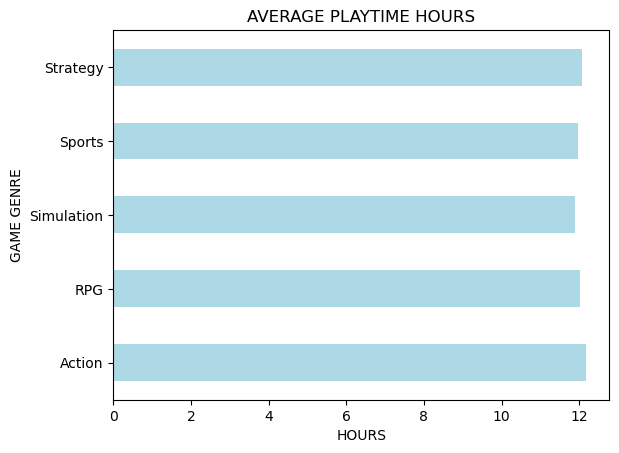

In [15]:
avg_play_time_by_hour=df.groupby("GameGenre")["PlayTimeHours"].mean()
avg_play_time_by_hour.plot(kind="barh",color="lightblue")
plt.xlabel("HOURS")
plt.ylabel("GAME GENRE")
plt.title("AVERAGE PLAYTIME HOURS")
avg_play_time_by_hour

<Axes: ylabel='EngagementLevel'>

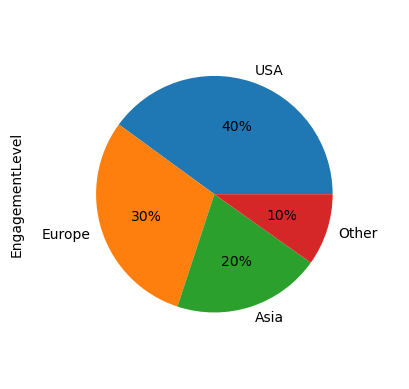

In [54]:
highest_enagement_location=df.groupby("Location")["EngagementLevel"].count()
highest_enagement_location.sort_values(ascending=False).plot(kind="pie",autopct="%.f%%",radius=0.8)

<Axes: ylabel='InGamePurchases'>

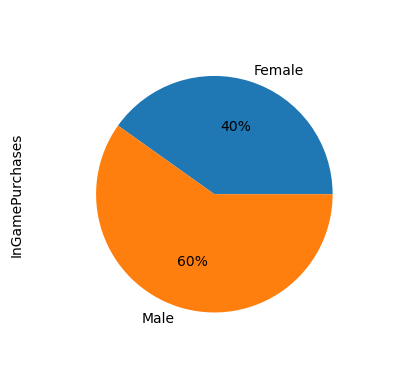

In [39]:
male_female_ratio=df.groupby("Gender")["InGamePurchases"].count()
male_female_ratio.plot(kind="pie",color=c,autopct="%.f%%",radius=0.8)

<Axes: ylabel='PlayerLevel'>

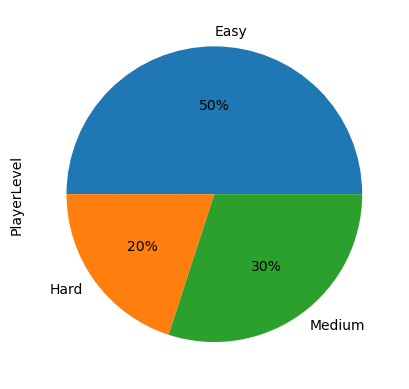

In [64]:
difficulty_level=df.groupby("GameDifficulty")["PlayerLevel"].count()
difficulty_level.plot(kind="pie",autopct="%.f%%")

GameGenre
Action        8039
RPG           7952
Simulation    7983
Sports        8048
Strategy      8012
Name: PlayerLevel, dtype: int64

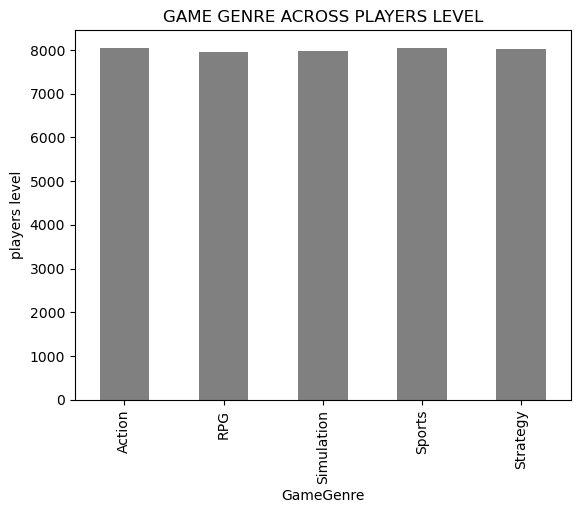

In [76]:
game_genre_across_player_level=df.groupby("GameGenre")["PlayerLevel"].count()
game_genre_across_player_level.plot(kind="bar",color="grey")
plt.title("GAME GENRE ACROSS PLAYERS LEVEL")
plt.ylabel("players level")
game_genre_across_player_level

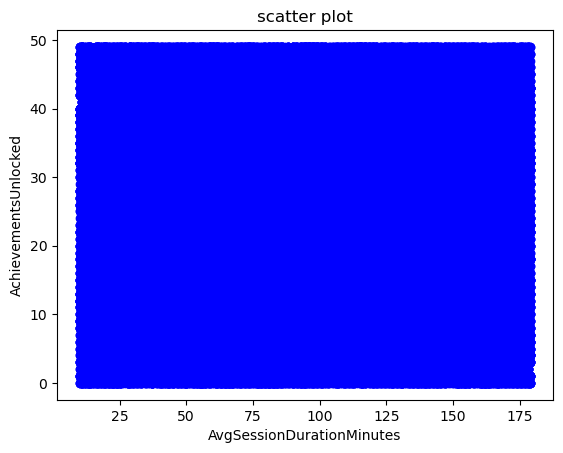

In [77]:
plt.scatter(df["AvgSessionDurationMinutes"],df["AchievementsUnlocked"],color="blue",marker="o")
plt.xlabel("AvgSessionDurationMinutes")
plt.ylabel("AchievementsUnlocked")
plt.title("scatter plot")
plt.show()

In [80]:
corr = df["AvgSessionDurationMinutes"].corr(df["AchievementsUnlocked"])
print(f"correlation: {corr*100}%")

correlation: -0.22269548483128046%


<Axes: xlabel='Location'>

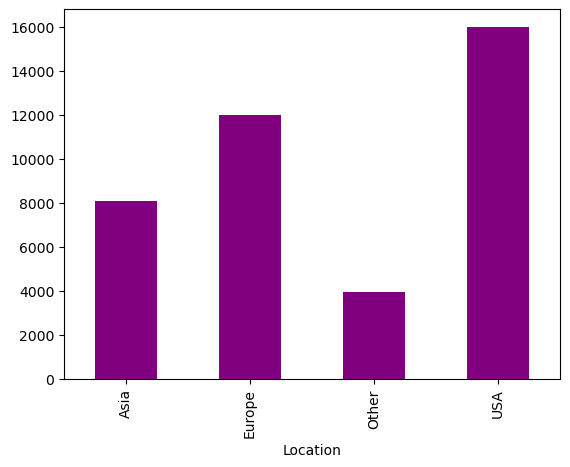

In [90]:
highest_engaged_country=df.groupby("Location")["PlayerID"].count()
highest_engaged_country.plot(kind="bar",color="purple")

(array([7935., 7973., 8105., 8141., 7880.]),
 array([15. , 21.8, 28.6, 35.4, 42.2, 49. ]),
 <BarContainer object of 5 artists>)

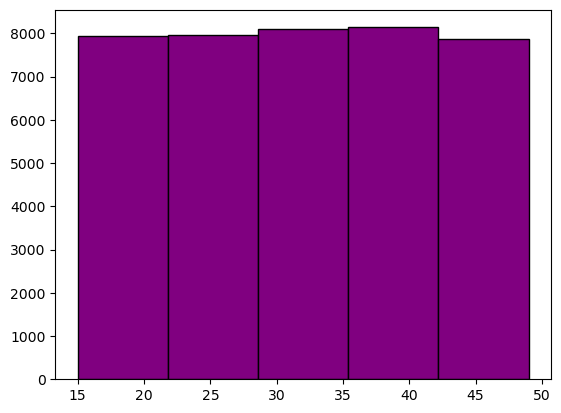

In [102]:
plt.hist(df["Age"],bins=5,color="purple",edgecolor="black")